# Pymaceuticals Inc.
---

### Analysis

- For the number of mice tested per drug regimen, Capomulin and Ramicane had the largest numbers of timpoints tested; Propriva had the lowest number of timepoints tested. The ratio of femail to male was fairly even with 51% of mice tested being female and 49% of mice tested being male. The distrubtions of Capomulin and Ramicane are less than Infobulin and Ceftamin. The Infomulin data includes an outlier. The average tumor volume and weight shows a positive correlation; as the mouse weight increases, the average tumor volume increases. The correlation coefficient is .84. 
 

In [242]:
#Import modules 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [3]:
#Setup paths to data
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [243]:
#Merge data into single dataframe
combined_df = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
# Checking the number of mice.

mouse_count = len(combined_df["Mouse ID"].unique())
mouse_count


249

In [24]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_timepoint_counts = combined_df[["Mouse ID","Timepoint"]].value_counts()
mouse_timepoint_counts


duplicate_df = mouse_timepoint_counts.loc[mouse_timepoint_counts > 1, :]
duplicate_index = duplicate_df.index
duplicate_mouse = pd.DataFrame(duplicate_index).iloc[0,0][0]
duplicate_mouse

'g989'

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = combined_df.loc[combined_df["Mouse ID"] == duplicate_mouse, :]
duplicate_mouse_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [244]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

duplicate_mouse_df_index = (duplicate_mouse_df.index).astype("float")
duplicate_mouse_df_index

clean_df = combined_df.drop(duplicate_mouse_df_index)
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [245]:
# Checking the number of mice in the clean DataFrame.
reduced_mouse_count = len(clean_df["Mouse ID"].unique())
reduced_mouse_count

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_groups = clean_df.groupby(clean_df["Drug Regimen"])

regimen_groups_mean = regimen_groups["Tumor Volume (mm3)"].mean()
regimen_groups_median = regimen_groups["Tumor Volume (mm3)"].median()
regimen_groups_var = regimen_groups["Tumor Volume (mm3)"].var()
regimen_groups_std = regimen_groups["Tumor Volume (mm3)"].std()
regimen_groups_sem = regimen_groups["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.

regimen_summary = pd.DataFrame({"Mean Tumor Volume": regimen_groups_mean , "Median Tumor Volume": regimen_groups_median, 
                                "Tumor Volume Variance": regimen_groups_var, "Tumor Volume Std. Dev.": regimen_groups_std, 
                                "Tumor Volume Std. Err.": regimen_groups_sem})

regimen_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
regimen_agg = regimen_groups.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
regimen_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

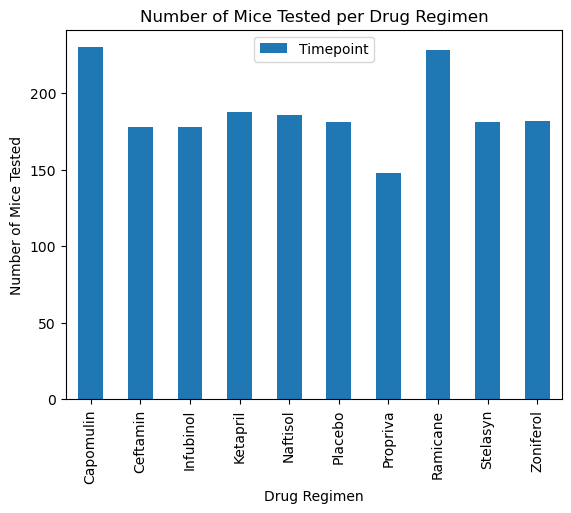

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_totals = pd.DataFrame(regimen_groups["Timepoint"].count())
regimen_totals.plot(kind="bar")
plt.title("Number of Mice Tested per Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

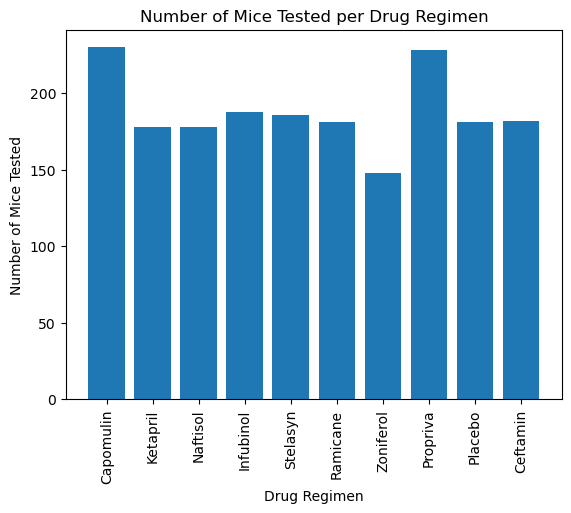

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(0, len(regimen_groups))
tick_locations = [location for location in x_axis]
plt.bar(x_axis, regimen_groups["Timepoint"].count())
plt.xticks(tick_locations, clean_df["Drug Regimen"].unique(), rotation="vertical")
plt.title("Number of Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

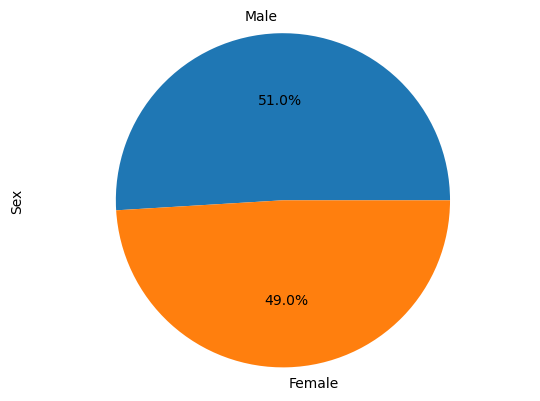

In [218]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
distribution_pie = clean_df["Sex"].value_counts().plot(kind="pie", y="Sex", autopct='%1.1f%%')

plt.axis("equal")

plt.show()


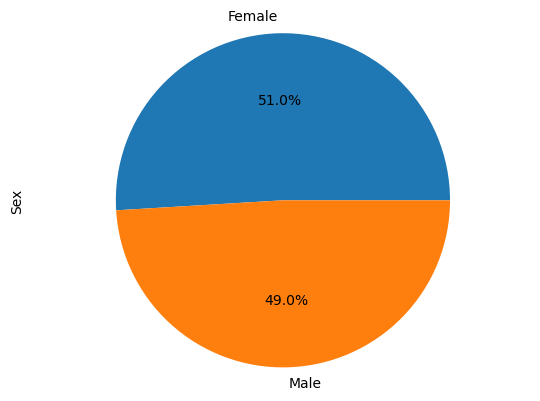

In [219]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex = clean_df["Sex"].unique()
sex_counts = clean_df["Sex"].value_counts()

plt.pie(sex_counts, labels=sex,autopct="%1.1f%%")
plt.axis("equal")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [273]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin 

# Start by getting the last (greatest) timepoint for each mouse
mice_groups = clean_df.groupby(clean_df["Mouse ID"])
greatest_timepoints = pd.DataFrame(mice_groups["Timepoint"].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_tumor_volume =  pd.merge(greatest_timepoints, clean_df, on=["Mouse ID"])

#Filtered dataframe to only include data where the last timepoint for each mouse is shown
final_tv_df = merged_tumor_volume.loc[merged_tumor_volume["Timepoint_x"] == merged_tumor_volume["Timepoint_y"], :]
final_tv_df = tumor_volume_last_timepoint.reset_index(drop=True)

In [272]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capomulin_data = []
ramicane_data = []
infubinol_data = []
ceftamin_data = []

#Pull out the tumor volume data for the last timeslots for each of the four regimens
for index, row in final_tv_df.iterrows():
    if row["Drug Regimen"] == treatments[0]:
        capomulin_data.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == treatments[1]:
        ramicane_data.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == treatments[2]:
        infubinol_data.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == treatments[3]:
        ceftamin_data.append(row["Tumor Volume (mm3)"])

#Create dataframe of capomulin_data, ramicane_data,infubinol_data, ceftamin_data to loop through 
four_tv_df = pd.DataFrame({treatments[0]: capomulin_data, treatments[1]: ramicane_data, 
                           treatments[2]: infubinol_data, treatments[3]: ceftamin_data})


In [271]:
#Calculate IQR and bounds for each regimen

#Capomulin 
cap_quart = four_tv_df[treatments[0]].quantile([.25,.5,.75])
cap_lowerq = cap_quart[0.25]
cap_upperq = cap_quart[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lowerb = cap_lowerq - (1.5*cap_iqr)
cap_upperb = cap_upperq + (1.5*cap_iqr)

#Ramicane
ram_quart = four_tv_df[treatments[1]].quantile([.25,.5,.75])
ram_lowerq = ram_quart[0.25]
ram_upperq = ram_quart[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lowerb = ram_lowerq - (1.5*ram_iqr)
ram_upperb = ram_upperq + (1.5*ram_iqr)

#Infubinol
inf_quart = four_tv_df[treatments[2]].quantile([.25,.5,.75])
inf_lowerq = inf_quart[0.25]
inf_upperq = inf_quart[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lowerb = inf_lowerq - (1.5*inf_iqr)
inf_upperb = inf_upperq + (1.5*inf_iqr)

#Ceftamin
cef_quart = four_tv_df[treatments[3]].quantile([.25,.5,.75])
cef_lowerq = cef_quart[0.25]
cef_upperq = cef_quart[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lowerb = cef_lowerq - (1.5*cef_iqr)
cef_upperb = cef_upperq + (1.5*cef_iqr)


In [270]:
#Loop through regimens quantitatively determine if there are any potential outliers
cap_outlier = []
ram_outlier = []
inf_outlier = []
cef_outlier = []

for index, row in four_tv_df.iterrows():
        if (row[treatments[0]] < cap_lowerb) |  (row[treatments[0]] > cap_upperb):
                cap_outlier.append(row[treatments[0]])
        if (row[treatments[1]] < ram_lowerb) |  (row[treatments[1]] > ram_upperb):
                ram_outlier.append(row[treatments[1]])                
        if (row[treatments[2]] < inf_lowerb) |  (row[treatments[2]] > inf_upperb):
                inf_outlier.append(row[treatments[2]]) 
        if (row[treatments[3]] < cef_lowerb) |  (row[treatments[3]] > cef_upperb):
                cef_outlier.append(row[treatments[3]])                

#Print results
print(f"{treatments[0]} Potential Outliers: {cap_outlier}")
print(f"{treatments[1]} Potential Outliers: {ram_outlier}")
print(f"{treatments[2]} Potential Outliers: {inf_outlier}")
print(f"{treatments[3]} Potential Outliers: {cef_outlier}")


Capomulin Potential Outliers: []
Ramicane Potential Outliers: []
Infubinol Potential Outliers: [36.3213458]
Ceftamin Potential Outliers: []


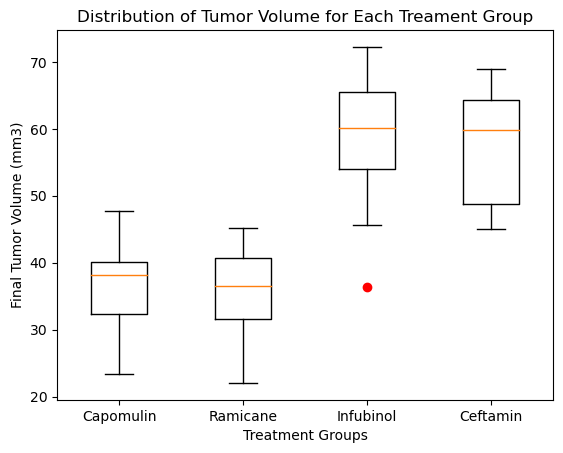

In [238]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Distribution of Tumor Volume for Each Treament Group')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel("Treatment Groups")
ax1.boxplot([capomulin_data,ramicane_data, infubinol_data, ceftamin_data], 0, 'r')
ax1.set_xticklabels([treatments[0],treatments[1],treatments[2],treatments[3]])

plt.show()



## Line and Scatter Plots

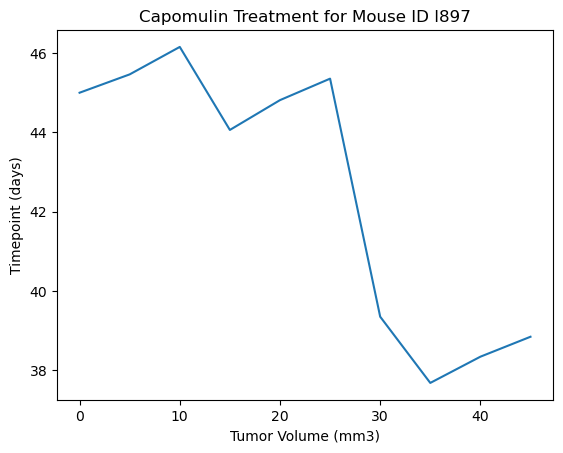

In [68]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_filter = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
capomulin_sample = pd.DataFrame(capomulin_filter["Mouse ID"].sample()).iloc[0,0]
x_axis = capomulin_filter.loc[capomulin_filter["Mouse ID"] == capomulin_sample, "Timepoint"]
y_axis = capomulin_filter.loc[capomulin_filter["Mouse ID"] == capomulin_sample, "Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)

plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint (days)")
plt.title(f"Capomulin Treatment for Mouse ID {capomulin_sample}")
plt.show()

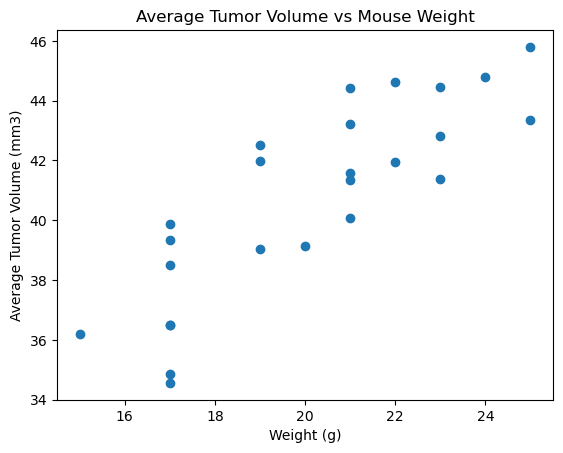

In [220]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_filter = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
capomulin_mice = capomulin_filter.groupby(capomulin_filter["Mouse ID"])
capomulin_means = capomulin_mice["Tumor Volume (mm3)"].mean()
capomulin_weights = capomulin_mice["Weight (g)"].mean()

plt.scatter(capomulin_weights, capomulin_means)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title(f"Average Tumor Volume vs Mouse Weight")

plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


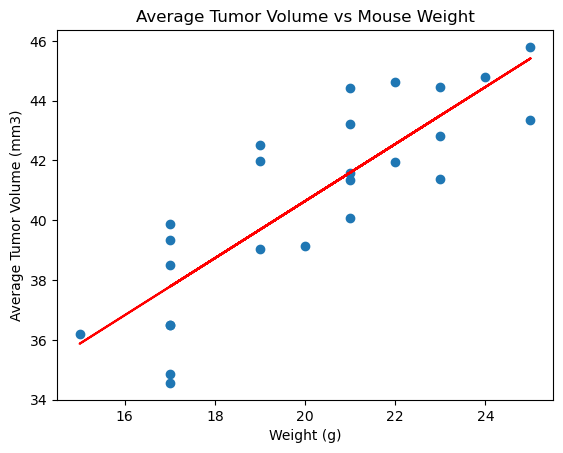

In [221]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_filter = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
capomulin_mice = capomulin_filter.groupby(capomulin_filter["Mouse ID"])
capomulin_means = capomulin_mice["Tumor Volume (mm3)"].mean()
capomulin_weights = capomulin_mice["Weight (g)"].mean()
x_values = capomulin_weights
y_values = capomulin_means

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title(f"Average Tumor Volume vs Mouse Weight")

plt.show()

